
# **Sentiment Analysis of Product Reviews using VADER**

 # **Project Overview**
<div style="font-size:18px;">
Companies receive a large volume of product reviews from customers on online platforms. 
Analyzing this data manually is time-consuming and inefficient. 
This project uses **VADER**, a Natural Language Processing (NLP) based sentiment analysis tool, to automatically analyze customer sentiments from product reviews and extract meaningful insights..
</div>    

# **Tools & Libraries Used**
<div style="font-size:18px;">
- Python
- Pandas
- VADER Sentiment Analyzer
- Matplotlib / Seaborn
</div>   

In [23]:
import pandas as pd

### Loading The Dataset

In [24]:
product_data=pd.read_csv("flipkart.csv")

In [25]:
pd.set_option('display.max_colwidth', None)

from IPython.display import display
display(product_data.head(10).style.set_properties(**{'white-space': 'normal'}))

,Unnamed: 0,Product_name,Review,Rating
0,0,"Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 1650/120 Hz) 15ACH6 Gaming Laptop (15.6 inch, Shadow Black, 2.25$$kg kg)",Best under 60k Great performanceI got it for around 58500Battery backup is bit low but thanks to rapid charger its very fast Display is Ok for this price range Decent speakers with many customisation optionsVantage software is so good for customisationOverall good performance till nowWill update later if any problem occurs,5
1,1,"Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 1650/120 Hz) 15ACH6 Gaming Laptop (15.6 inch, Shadow Black, 2.25$$kg kg)",Good perfomence...,5
2,2,"Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 1650/120 Hz) 15ACH6 Gaming Laptop (15.6 inch, Shadow Black, 2.25$$kg kg)","Great performance but usually it has also that gaming laptop's issue of battery. It can only stand for 2 - 3 hrs without adapter. So, I prefer that use it with adaptor if you are using any software or playing games.",5
3,3,"DELL Inspiron Athlon Dual Core 3050U - (4 GB/256 GB SSD/Windows 11 Home) INSPIRON 3515 Thin and Light Laptop (15.6 Inch, Carbon Black, 1.8 Kgs, With MS Office)",My wife is so happy and best product 👌🏻😘,5
4,4,"DELL Inspiron Athlon Dual Core 3050U - (4 GB/256 GB SSD/Windows 11 Home) INSPIRON 3515 Thin and Light Laptop (15.6 Inch, Carbon Black, 1.8 Kgs, With MS Office)","Light weight laptop with new amazing features, battery life is awesome.",5
5,5,"DELL Inspiron Athlon Dual Core 3050U - (4 GB/256 GB SSD/Windows 11 Home) INSPIRON 3515 Thin and Light Laptop (15.6 Inch, Carbon Black, 1.8 Kgs, With MS Office)","Amazing laptop, am so much happy, thanks for Flipkart.",5
6,6,"DELL Inspiron Athlon Dual Core 3050U - (4 GB/256 GB SSD/Windows 11 Home) INSPIRON 3515 Thin and Light Laptop (15.6 Inch, Carbon Black, 1.8 Kgs, With MS Office)",Over all a good laptop for personal use,5
7,7,"DELL Inspiron Athlon Dual Core 3050U - (4 GB/256 GB SSD/Windows 11 Home) INSPIRON 3515 Thin and Light Laptop (15.6 Inch, Carbon Black, 1.8 Kgs, With MS Office)",Thank you so much Flipkart,4
8,8,"DELL Inspiron Athlon Dual Core 3050U - (4 GB/256 GB SSD/Windows 11 Home) INSPIRON 3515 Thin and Light Laptop (15.6 Inch, Carbon Black, 1.8 Kgs, With MS Office)",Amazing product,5
9,9,"DELL Inspiron Athlon Dual Core 3050U - (4 GB/256 GB SSD/Windows 11 Home) INSPIRON 3515 Thin and Light Laptop (15.6 Inch, Carbon Black, 1.8 Kgs, With MS Office)","Good for normal work , students, online classes, watching movies etc.Not for havy tasks, gaming, buisness work, office work.editing etc.Overall good laptop in this range in budget laptops.",3


### The dataset is loaded and the first few rows are displayed to understand its structure

## Data Cleaning 
### removing unnecessary index column (unamed:0)

In [26]:
product_data.drop(product_data.columns[0],axis=1,inplace=True)

In [27]:
product_data.head(5)

,Product_name,Review,Rating
0,"Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 1650/120 Hz) 15ACH6 Gaming Laptop (15.6 inch, Shadow Black, 2.25$$kg kg)",Best under 60k Great performanceI got it for around 58500Battery backup is bit low but thanks to rapid charger its very fast Display is Ok for this price range Decent speakers with many customisation optionsVantage software is so good for customisationOverall good performance till nowWill update later if any problem occurs,5
1,"Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 1650/120 Hz) 15ACH6 Gaming Laptop (15.6 inch, Shadow Black, 2.25$$kg kg)",Good perfomence...,5
2,"Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 1650/120 Hz) 15ACH6 Gaming Laptop (15.6 inch, Shadow Black, 2.25$$kg kg)","Great performance but usually it has also that gaming laptop's issue of battery. It can only stand for 2 - 3 hrs without adapter. So, I prefer that use it with adaptor if you are using any software or playing games.",5
3,"DELL Inspiron Athlon Dual Core 3050U - (4 GB/256 GB SSD/Windows 11 Home) INSPIRON 3515 Thin and Light Laptop (15.6 Inch, Carbon Black, 1.8 Kgs, With MS Office)",My wife is so happy and best product 👌🏻😘,5
4,"DELL Inspiron Athlon Dual Core 3050U - (4 GB/256 GB SSD/Windows 11 Home) INSPIRON 3515 Thin and Light Laptop (15.6 Inch, Carbon Black, 1.8 Kgs, With MS Office)","Light weight laptop with new amazing features, battery life is awesome.",5


## Initial Data Exploration

In [28]:
product_data.head()

,Product_name,Review,Rating
0,"Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 1650/120 Hz) 15ACH6 Gaming Laptop (15.6 inch, Shadow Black, 2.25$$kg kg)",Best under 60k Great performanceI got it for around 58500Battery backup is bit low but thanks to rapid charger its very fast Display is Ok for this price range Decent speakers with many customisation optionsVantage software is so good for customisationOverall good performance till nowWill update later if any problem occurs,5
1,"Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 1650/120 Hz) 15ACH6 Gaming Laptop (15.6 inch, Shadow Black, 2.25$$kg kg)",Good perfomence...,5
2,"Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 1650/120 Hz) 15ACH6 Gaming Laptop (15.6 inch, Shadow Black, 2.25$$kg kg)","Great performance but usually it has also that gaming laptop's issue of battery. It can only stand for 2 - 3 hrs without adapter. So, I prefer that use it with adaptor if you are using any software or playing games.",5
3,"DELL Inspiron Athlon Dual Core 3050U - (4 GB/256 GB SSD/Windows 11 Home) INSPIRON 3515 Thin and Light Laptop (15.6 Inch, Carbon Black, 1.8 Kgs, With MS Office)",My wife is so happy and best product 👌🏻😘,5
4,"DELL Inspiron Athlon Dual Core 3050U - (4 GB/256 GB SSD/Windows 11 Home) INSPIRON 3515 Thin and Light Laptop (15.6 Inch, Carbon Black, 1.8 Kgs, With MS Office)","Light weight laptop with new amazing features, battery life is awesome.",5


In [29]:
product_data.tail()

,Product_name,Review,Rating
2299,"MSI 27 inch Full HD IPS Panel Monitor (PRO MP271(3PA2)) (Response Time: 5 ms, 75 Hz Refresh Rate)","Great display, accurate colours at this price range",5
2300,"MSI 27 inch Full HD IPS Panel Monitor (PRO MP271(3PA2)) (Response Time: 5 ms, 75 Hz Refresh Rate)",Superb monitor first brought 1 used for 2 months and after that bought another one .,5
2301,"MSI 27 inch Full HD IPS Panel Monitor (PRO MP271(3PA2)) (Response Time: 5 ms, 75 Hz Refresh Rate)",Awesome,5
2302,"MSI 27 inch Full HD IPS Panel Monitor (PRO MP271(3PA2)) (Response Time: 5 ms, 75 Hz Refresh Rate)",Only one issue with adapter,5
2303,"MSI 27 inch Full HD IPS Panel Monitor (PRO MP271(3PA2)) (Response Time: 5 ms, 75 Hz Refresh Rate)",Worth the money u spend for this monitor Great deal Using for cctv footage monitorWonderful built MSI brand which we can trust for,5


In [30]:
product_data.shape

(2304, 3)

In [31]:
product_data.columns

Index(['Product_name', 'Review', 'Rating'], dtype='object')

In [32]:
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304 entries, 0 to 2303
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product_name  2304 non-null   object
 1   Review        2304 non-null   object
 2   Rating        2304 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 54.1+ KB


##  Descriptive Statistics
### Statistical summary of numerical features to understand data distribution.

In [33]:
product_data.describe()

,Rating
count,2304.000000
mean,4.259549
std,1.180017
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


## Missing Values Analysis
### Checking for missing values to ensure data quality before sentiment analysis

In [34]:
product_data.isnull()

,Product_name,Review,Rating
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2299,False,False,False
2300,False,False,False
2301,False,False,False
2302,False,False,False


In [35]:
product_data.isnull().sum()

Product_name    0
Review          0
Rating          0
dtype: int64

### so our dataset has no missing values

## Product Analysis
### Analyzing the Products

In [36]:
product_data['Product_name'].value_counts().head(10)

Product_name
realme C25Y (Glacier Blue, 128 GB)  (4 GB RAM)     20
realme C21Y (Cross Black, 32 GB)  (3 GB RAM)       20
realme C21Y (Cross Blue, 64 GB)  (4 GB RAM)        20
realme C25_Y (Glacier Blue, 64 GB)  (4 GB RAM)     20
realme C21Y (Cross Black, 64 GB)  (4 GB RAM)       20
realme C25_Y (Glacier Blue, 128 GB)  (4 GB RAM)    20
realme C25_Y (Metal Grey, 64 GB)  (4 GB RAM)       20
realme C21Y (Cross Blue, 32 GB)  (3 GB RAM)        20
realme C25Y (Metal Grey, 128 GB)  (4 GB RAM)       20
realme C25_Y (Metal Grey, 128 GB)  (4 GB RAM)      20
Name: count, dtype: int64

In [37]:
product_data['Product_name'].value_counts().tail(10)

Product_name
HP Ryzen 3 Quad Core 5300U - (8 GB/512 GB SSD/Windows 11 Home) 15s-eq2143au Thin and Light Laptop  (15.6 inch, Natural Silver, 1.69 Kg, With MS Office)                                          3
ASUS Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) X515EA-EJ312WS Thin and Light Laptop  (15.6 inch, Transparent Silver, 1.80 kg, With MS Office)                                         3
Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 1650/120 Hz) 15ACH6 Gaming Laptop  (15.6 inch, Shadow Black, 2.25$$kg kg)    3
Lenovo ThinkBook 13s Core i5 11th Gen - (16 GB/512 GB SSD/Windows 10 Home) TB13s ITL Gen 2 Thin and Light Laptop  (13 inch, Mineral Grey, 1.26 kg, With MS Office)                               3
DELL Inspiron Ryzen 3 Dual Core 3250U - (8 GB/256 GB SSD/Windows 11 Home) INSPIRON 3515 Thin and Light Laptop  (15.6 Inch, Carbon Black, 1.8 Kgs, With MS Office)                                2
Lenovo IdeaP

In [38]:
print("Total unique products:", product_data['Product_name'].nunique())

Total unique products: 231


In [39]:
print("this is the count of each rating",product_data['Rating'].value_counts())

this is the count of each rating Rating
5    1382
4     552
1     184
3     140
2      46
Name: count, dtype: int64


In [40]:
product_data['Rating'].value_counts(normalize=True) * 100

Rating
5    59.982639
4    23.958333
1     7.986111
3     6.076389
2     1.996528
Name: proportion, dtype: float64

## Feature Engineering: Review Length
### A new feature `review_length` is created to represent the number of charactersin each review. 

In [41]:
product_data.loc[:, 'Review_length'] = product_data['Review'].apply(len)

In [42]:
product_data['Review_length'].describe()

count    2304.000000
mean      192.018229
std       169.321059
min         2.000000
25%        33.000000
50%       148.000000
75%       318.000000
max       500.000000
Name: Review_length, dtype: float64

### Reivew_Length Distribution

In [43]:
plt.figure(figsize=(8,5))
sns.histplot(product_data['review_length'], bins=30, kde=True)
plt.title("Distribution of Review Length")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()

NameError: name 'plt' is not defined

In [44]:
product_data.head(5)

,Product_name,Review,Rating,Review_length
0,"Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 1650/120 Hz) 15ACH6 Gaming Laptop (15.6 inch, Shadow Black, 2.25$$kg kg)",Best under 60k Great performanceI got it for around 58500Battery backup is bit low but thanks to rapid charger its very fast Display is Ok for this price range Decent speakers with many customisation optionsVantage software is so good for customisationOverall good performance till nowWill update later if any problem occurs,5,324
1,"Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 1650/120 Hz) 15ACH6 Gaming Laptop (15.6 inch, Shadow Black, 2.25$$kg kg)",Good perfomence...,5,18
2,"Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 1650/120 Hz) 15ACH6 Gaming Laptop (15.6 inch, Shadow Black, 2.25$$kg kg)","Great performance but usually it has also that gaming laptop's issue of battery. It can only stand for 2 - 3 hrs without adapter. So, I prefer that use it with adaptor if you are using any software or playing games.",5,215
3,"DELL Inspiron Athlon Dual Core 3050U - (4 GB/256 GB SSD/Windows 11 Home) INSPIRON 3515 Thin and Light Laptop (15.6 Inch, Carbon Black, 1.8 Kgs, With MS Office)",My wife is so happy and best product 👌🏻😘,5,40
4,"DELL Inspiron Athlon Dual Core 3050U - (4 GB/256 GB SSD/Windows 11 Home) INSPIRON 3515 Thin and Light Laptop (15.6 Inch, Carbon Black, 1.8 Kgs, With MS Office)","Light weight laptop with new amazing features, battery life is awesome.",5,71


In [45]:
product_data.tail(5)

,Product_name,Review,Rating,Review_length
2299,"MSI 27 inch Full HD IPS Panel Monitor (PRO MP271(3PA2)) (Response Time: 5 ms, 75 Hz Refresh Rate)","Great display, accurate colours at this price range",5,51
2300,"MSI 27 inch Full HD IPS Panel Monitor (PRO MP271(3PA2)) (Response Time: 5 ms, 75 Hz Refresh Rate)",Superb monitor first brought 1 used for 2 months and after that bought another one .,5,84
2301,"MSI 27 inch Full HD IPS Panel Monitor (PRO MP271(3PA2)) (Response Time: 5 ms, 75 Hz Refresh Rate)",Awesome,5,7
2302,"MSI 27 inch Full HD IPS Panel Monitor (PRO MP271(3PA2)) (Response Time: 5 ms, 75 Hz Refresh Rate)",Only one issue with adapter,5,27
2303,"MSI 27 inch Full HD IPS Panel Monitor (PRO MP271(3PA2)) (Response Time: 5 ms, 75 Hz Refresh Rate)",Worth the money u spend for this monitor Great deal Using for cctv footage monitorWonderful built MSI brand which we can trust for,5,130


### Analyzing Distribution of Rating 

<Axes: xlabel='Rating'>

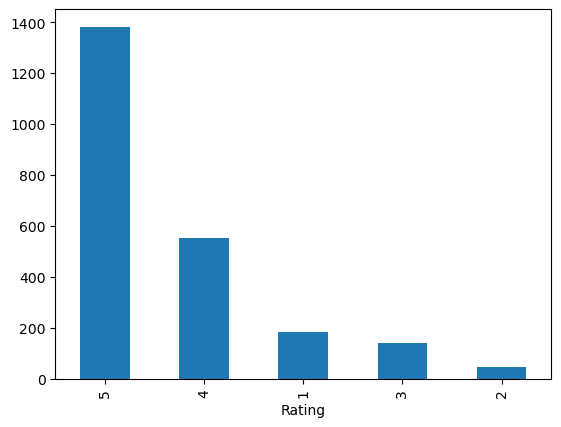

In [46]:
product_data.Rating.value_counts().plot(kind="bar")

## Creating Sentiment Labels (**SENTIMENT ANALYSIS**)

In [47]:
!pip install vaderSentiment

In [48]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

## Preparing Our Dataset
### Steps Performed:
- Removed rows with missing review text
- Converted review text to string format
- Initialized the VADER Sentiment Analyzer
- Computed sentiment scores for each review
- Generated sentiment labels using quantile-based thresholds

In [49]:
product_data=product_data.dropna(subset=['Review'])

In [50]:
product_data.loc[:, 'Review']=product_data['Review'].fillna("").astype(str)

In [51]:
product_data.head(5)

,Product_name,Review,Rating,Review_length
0,"Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 1650/120 Hz) 15ACH6 Gaming Laptop (15.6 inch, Shadow Black, 2.25$$kg kg)",Best under 60k Great performanceI got it for around 58500Battery backup is bit low but thanks to rapid charger its very fast Display is Ok for this price range Decent speakers with many customisation optionsVantage software is so good for customisationOverall good performance till nowWill update later if any problem occurs,5,324
1,"Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 1650/120 Hz) 15ACH6 Gaming Laptop (15.6 inch, Shadow Black, 2.25$$kg kg)",Good perfomence...,5,18
2,"Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 1650/120 Hz) 15ACH6 Gaming Laptop (15.6 inch, Shadow Black, 2.25$$kg kg)","Great performance but usually it has also that gaming laptop's issue of battery. It can only stand for 2 - 3 hrs without adapter. So, I prefer that use it with adaptor if you are using any software or playing games.",5,215
3,"DELL Inspiron Athlon Dual Core 3050U - (4 GB/256 GB SSD/Windows 11 Home) INSPIRON 3515 Thin and Light Laptop (15.6 Inch, Carbon Black, 1.8 Kgs, With MS Office)",My wife is so happy and best product 👌🏻😘,5,40
4,"DELL Inspiron Athlon Dual Core 3050U - (4 GB/256 GB SSD/Windows 11 Home) INSPIRON 3515 Thin and Light Laptop (15.6 Inch, Carbon Black, 1.8 Kgs, With MS Office)","Light weight laptop with new amazing features, battery life is awesome.",5,71


In [52]:
SIA= SentimentIntensityAnalyzer()

In [53]:
product_data['Sentiment_Score'] = product_data['Review'].apply(lambda x: SIA.polarity_scores(x)['compound'])

In [54]:
product_data.head(10)

,Product_name,Review,Rating,Review_length,Sentiment_Score
0,"Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 1650/120 Hz) 15ACH6 Gaming Laptop (15.6 inch, Shadow Black, 2.25$$kg kg)",Best under 60k Great performanceI got it for around 58500Battery backup is bit low but thanks to rapid charger its very fast Display is Ok for this price range Decent speakers with many customisation optionsVantage software is so good for customisationOverall good performance till nowWill update later if any problem occurs,5,324,0.9490
1,"Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 1650/120 Hz) 15ACH6 Gaming Laptop (15.6 inch, Shadow Black, 2.25$$kg kg)",Good perfomence...,5,18,0.4404
2,"Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 1650/120 Hz) 15ACH6 Gaming Laptop (15.6 inch, Shadow Black, 2.25$$kg kg)","Great performance but usually it has also that gaming laptop's issue of battery. It can only stand for 2 - 3 hrs without adapter. So, I prefer that use it with adaptor if you are using any software or playing games.",5,215,0.5789
3,"DELL Inspiron Athlon Dual Core 3050U - (4 GB/256 GB SSD/Windows 11 Home) INSPIRON 3515 Thin and Light Laptop (15.6 Inch, Carbon Black, 1.8 Kgs, With MS Office)",My wife is so happy and best product 👌🏻😘,5,40,0.9592
4,"DELL Inspiron Athlon Dual Core 3050U - (4 GB/256 GB SSD/Windows 11 Home) INSPIRON 3515 Thin and Light Laptop (15.6 Inch, Carbon Black, 1.8 Kgs, With MS Office)","Light weight laptop with new amazing features, battery life is awesome.",5,71,0.8360
5,"DELL Inspiron Athlon Dual Core 3050U - (4 GB/256 GB SSD/Windows 11 Home) INSPIRON 3515 Thin and Light Laptop (15.6 Inch, Carbon Black, 1.8 Kgs, With MS Office)","Amazing laptop, am so much happy, thanks for Flipkart.",5,54,0.8988
6,"DELL Inspiron Athlon Dual Core 3050U - (4 GB/256 GB SSD/Windows 11 Home) INSPIRON 3515 Thin and Light Laptop (15.6 Inch, Carbon Black, 1.8 Kgs, With MS Office)",Over all a good laptop for personal use,5,39,0.4404
7,"DELL Inspiron Athlon Dual Core 3050U - (4 GB/256 GB SSD/Windows 11 Home) INSPIRON 3515 Thin and Light Laptop (15.6 Inch, Carbon Black, 1.8 Kgs, With MS Office)",Thank you so much Flipkart,4,26,0.3612
8,"DELL Inspiron Athlon Dual Core 3050U - (4 GB/256 GB SSD/Windows 11 Home) INSPIRON 3515 Thin and Light Laptop (15.6 Inch, Carbon Black, 1.8 Kgs, With MS Office)",Amazing product,5,15,0.5859
9,"DELL Inspiron Athlon Dual Core 3050U - (4 GB/256 GB SSD/Windows 11 Home) INSPIRON 3515 Thin and Light Laptop (15.6 Inch, Carbon Black, 1.8 Kgs, With MS Office)","Good for normal work , students, online classes, watching movies etc.Not for havy tasks, gaming, buisness work, office work.editing etc.Overall good laptop in this range in budget laptops.",3,188,0.7003


In [55]:
product_data.tail(10)

,Product_name,Review,Rating,Review_length,Sentiment_Score
2294,"MSI 27 inch Full HD IPS Panel Monitor (PRO MP271(3PA2)) (Response Time: 5 ms, 75 Hz Refresh Rate)",The device is really nice and stand is sturdy as well.Will totally recommend this for a multiple monitor setup since the bezels are really thin.,5,144,0.7083
2295,"MSI 27 inch Full HD IPS Panel Monitor (PRO MP271(3PA2)) (Response Time: 5 ms, 75 Hz Refresh Rate)","Considering the price its a great deal.. However, the max brightness is slightly less than ideal.. And the refresh rate isn't great while watching videos..",4,155,0.7402
2296,"MSI 27 inch Full HD IPS Panel Monitor (PRO MP271(3PA2)) (Response Time: 5 ms, 75 Hz Refresh Rate)",Awesome display. Best to use WFH for coders. Display is sharp and no bleeding cell. Just perfect 👍,5,98,0.8957
2297,"MSI 27 inch Full HD IPS Panel Monitor (PRO MP271(3PA2)) (Response Time: 5 ms, 75 Hz Refresh Rate)",The product from MSI is good. But the service from flipkart is horrible. The sound quality of monitor is average and wanted to return it and buy some other monitor with better sound quality. But flipkart won't allow it. For me it's noting more than a junk. Total waste. If you have extra money and need a junk that seems pretty go and buy products from flipkart.I am keeping this in my store room as a souvenir from Flipkart.*Can't you guys even publish a genuine feedback*,2,473,-0.1995
2298,"MSI 27 inch Full HD IPS Panel Monitor (PRO MP271(3PA2)) (Response Time: 5 ms, 75 Hz Refresh Rate)","Cool and best in below 9000 prize range ,go for it",5,50,0.8689
2299,"MSI 27 inch Full HD IPS Panel Monitor (PRO MP271(3PA2)) (Response Time: 5 ms, 75 Hz Refresh Rate)","Great display, accurate colours at this price range",5,51,0.6249
2300,"MSI 27 inch Full HD IPS Panel Monitor (PRO MP271(3PA2)) (Response Time: 5 ms, 75 Hz Refresh Rate)",Superb monitor first brought 1 used for 2 months and after that bought another one .,5,84,0.6249
2301,"MSI 27 inch Full HD IPS Panel Monitor (PRO MP271(3PA2)) (Response Time: 5 ms, 75 Hz Refresh Rate)",Awesome,5,7,0.6249
2302,"MSI 27 inch Full HD IPS Panel Monitor (PRO MP271(3PA2)) (Response Time: 5 ms, 75 Hz Refresh Rate)",Only one issue with adapter,5,27,0.0000
2303,"MSI 27 inch Full HD IPS Panel Monitor (PRO MP271(3PA2)) (Response Time: 5 ms, 75 Hz Refresh Rate)",Worth the money u spend for this monitor Great deal Using for cctv footage monitorWonderful built MSI brand which we can trust for,5,130,0.8519


### Understanding Sentiment_Score

In [56]:
product_data['Sentiment_Score'].describe()

count    2304.000000
mean        0.600508
std         0.460533
min        -0.977300
25%         0.440400
50%         0.811850
75%         0.933450
max         0.998500
Name: Sentiment_Score, dtype: float64

<Axes: >

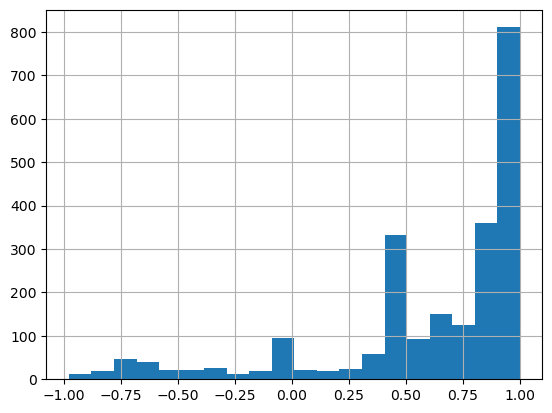

In [57]:
product_data['Sentiment_Score'].hist(bins=20)

In [58]:
product_data['Sentiment_Score'].quantile([0.1, 0.2, 0.3, 0.7, 0.8, 0.9])

0.1   -0.04548
0.2    0.42150
0.3    0.47540
0.7    0.92050
0.8    0.94990
0.9    0.96734
Name: Sentiment_Score, dtype: float64

In [59]:
q_low  = product_data['Sentiment_Score'].quantile(0.10)
q_high = product_data['Sentiment_Score'].quantile(0.80)

In [60]:
def label_sentiment(Rating):
    if Rating <= q_low:
        return 'Negative'
    elif Rating >= q_high:
        return 'Positive'
    else:
        return 'Neutral'

In [61]:
product_data.loc[:, 'Sentiment'] = product_data['Sentiment_Score'].apply(label_sentiment)

In [62]:
product_data.head(10)

,Product_name,Review,Rating,Review_length,Sentiment_Score,Sentiment
0,"Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 1650/120 Hz) 15ACH6 Gaming Laptop (15.6 inch, Shadow Black, 2.25$$kg kg)",Best under 60k Great performanceI got it for around 58500Battery backup is bit low but thanks to rapid charger its very fast Display is Ok for this price range Decent speakers with many customisation optionsVantage software is so good for customisationOverall good performance till nowWill update later if any problem occurs,5,324,0.9490,Neutral
1,"Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 1650/120 Hz) 15ACH6 Gaming Laptop (15.6 inch, Shadow Black, 2.25$$kg kg)",Good perfomence...,5,18,0.4404,Neutral
2,"Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 1650/120 Hz) 15ACH6 Gaming Laptop (15.6 inch, Shadow Black, 2.25$$kg kg)","Great performance but usually it has also that gaming laptop's issue of battery. It can only stand for 2 - 3 hrs without adapter. So, I prefer that use it with adaptor if you are using any software or playing games.",5,215,0.5789,Neutral
3,"DELL Inspiron Athlon Dual Core 3050U - (4 GB/256 GB SSD/Windows 11 Home) INSPIRON 3515 Thin and Light Laptop (15.6 Inch, Carbon Black, 1.8 Kgs, With MS Office)",My wife is so happy and best product 👌🏻😘,5,40,0.9592,Positive
4,"DELL Inspiron Athlon Dual Core 3050U - (4 GB/256 GB SSD/Windows 11 Home) INSPIRON 3515 Thin and Light Laptop (15.6 Inch, Carbon Black, 1.8 Kgs, With MS Office)","Light weight laptop with new amazing features, battery life is awesome.",5,71,0.8360,Neutral
5,"DELL Inspiron Athlon Dual Core 3050U - (4 GB/256 GB SSD/Windows 11 Home) INSPIRON 3515 Thin and Light Laptop (15.6 Inch, Carbon Black, 1.8 Kgs, With MS Office)","Amazing laptop, am so much happy, thanks for Flipkart.",5,54,0.8988,Neutral
6,"DELL Inspiron Athlon Dual Core 3050U - (4 GB/256 GB SSD/Windows 11 Home) INSPIRON 3515 Thin and Light Laptop (15.6 Inch, Carbon Black, 1.8 Kgs, With MS Office)",Over all a good laptop for personal use,5,39,0.4404,Neutral
7,"DELL Inspiron Athlon Dual Core 3050U - (4 GB/256 GB SSD/Windows 11 Home) INSPIRON 3515 Thin and Light Laptop (15.6 Inch, Carbon Black, 1.8 Kgs, With MS Office)",Thank you so much Flipkart,4,26,0.3612,Neutral
8,"DELL Inspiron Athlon Dual Core 3050U - (4 GB/256 GB SSD/Windows 11 Home) INSPIRON 3515 Thin and Light Laptop (15.6 Inch, Carbon Black, 1.8 Kgs, With MS Office)",Amazing product,5,15,0.5859,Neutral
9,"DELL Inspiron Athlon Dual Core 3050U - (4 GB/256 GB SSD/Windows 11 Home) INSPIRON 3515 Thin and Light Laptop (15.6 Inch, Carbon Black, 1.8 Kgs, With MS Office)","Good for normal work , students, online classes, watching movies etc.Not for havy tasks, gaming, buisness work, office work.editing etc.Overall good laptop in this range in budget laptops.",3,188,0.7003,Neutral


In [63]:
product_data['Sentiment'].value_counts()

Sentiment
Neutral     1610
Positive     463
Negative     231
Name: count, dtype: int64

### Defining Sentiment in form of Mood_Numeric

In [64]:
def mood_numeric(Rating):
    if Rating <= q_low:
        return -1
    elif Rating >= q_high:
        return 1
    else:
        return 0

In [65]:
product_data.loc[:, 'Mood_numeric']=product_data['Sentiment_Score'].apply(mood_numeric)

In [66]:
product_data.head(10)

,Product_name,Review,Rating,Review_length,Sentiment_Score,Sentiment,Mood_numeric
0,"Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 1650/120 Hz) 15ACH6 Gaming Laptop (15.6 inch, Shadow Black, 2.25$$kg kg)",Best under 60k Great performanceI got it for around 58500Battery backup is bit low but thanks to rapid charger its very fast Display is Ok for this price range Decent speakers with many customisation optionsVantage software is so good for customisationOverall good performance till nowWill update later if any problem occurs,5,324,0.9490,Neutral,0
1,"Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 1650/120 Hz) 15ACH6 Gaming Laptop (15.6 inch, Shadow Black, 2.25$$kg kg)",Good perfomence...,5,18,0.4404,Neutral,0
2,"Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 1650/120 Hz) 15ACH6 Gaming Laptop (15.6 inch, Shadow Black, 2.25$$kg kg)","Great performance but usually it has also that gaming laptop's issue of battery. It can only stand for 2 - 3 hrs without adapter. So, I prefer that use it with adaptor if you are using any software or playing games.",5,215,0.5789,Neutral,0
3,"DELL Inspiron Athlon Dual Core 3050U - (4 GB/256 GB SSD/Windows 11 Home) INSPIRON 3515 Thin and Light Laptop (15.6 Inch, Carbon Black, 1.8 Kgs, With MS Office)",My wife is so happy and best product 👌🏻😘,5,40,0.9592,Positive,1
4,"DELL Inspiron Athlon Dual Core 3050U - (4 GB/256 GB SSD/Windows 11 Home) INSPIRON 3515 Thin and Light Laptop (15.6 Inch, Carbon Black, 1.8 Kgs, With MS Office)","Light weight laptop with new amazing features, battery life is awesome.",5,71,0.8360,Neutral,0
5,"DELL Inspiron Athlon Dual Core 3050U - (4 GB/256 GB SSD/Windows 11 Home) INSPIRON 3515 Thin and Light Laptop (15.6 Inch, Carbon Black, 1.8 Kgs, With MS Office)","Amazing laptop, am so much happy, thanks for Flipkart.",5,54,0.8988,Neutral,0
6,"DELL Inspiron Athlon Dual Core 3050U - (4 GB/256 GB SSD/Windows 11 Home) INSPIRON 3515 Thin and Light Laptop (15.6 Inch, Carbon Black, 1.8 Kgs, With MS Office)",Over all a good laptop for personal use,5,39,0.4404,Neutral,0
7,"DELL Inspiron Athlon Dual Core 3050U - (4 GB/256 GB SSD/Windows 11 Home) INSPIRON 3515 Thin and Light Laptop (15.6 Inch, Carbon Black, 1.8 Kgs, With MS Office)",Thank you so much Flipkart,4,26,0.3612,Neutral,0
8,"DELL Inspiron Athlon Dual Core 3050U - (4 GB/256 GB SSD/Windows 11 Home) INSPIRON 3515 Thin and Light Laptop (15.6 Inch, Carbon Black, 1.8 Kgs, With MS Office)",Amazing product,5,15,0.5859,Neutral,0
9,"DELL Inspiron Athlon Dual Core 3050U - (4 GB/256 GB SSD/Windows 11 Home) INSPIRON 3515 Thin and Light Laptop (15.6 Inch, Carbon Black, 1.8 Kgs, With MS Office)","Good for normal work , students, online classes, watching movies etc.Not for havy tasks, gaming, buisness work, office work.editing etc.Overall good laptop in this range in budget laptops.",3,188,0.7003,Neutral,0


### Text Preprocessing and Cleaning
<div style="font-size:18px;">
After generating sentiment labels, additional text preprocessing and cleaning is performed to improve readability and support further analysis and visualization.
</div>

In [67]:
product_data.duplicated().sum()

np.int64(123)

In [68]:
product_data=product_data.drop_duplicates()

In [69]:
product_data.duplicated().sum()

np.int64(0)

In [70]:
import re

In [71]:
def clean_review(Review):
    text = re.sub(r'<.*?>', '', Review)   
    text = re.sub(r'http\S+|www\S+', '', Review) 
    text = re.sub(r'\s+', ' ', text).strip()    
    return Review

In [72]:
product_data.loc[:, 'Clean_Review'] = product_data['Review'].apply(clean_review)

In [73]:
product_data.head(10)

,Product_name,Review,Rating,Review_length,Sentiment_Score,Sentiment,Mood_numeric,Clean_Review
0,"Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 1650/120 Hz) 15ACH6 Gaming Laptop (15.6 inch, Shadow Black, 2.25$$kg kg)",Best under 60k Great performanceI got it for around 58500Battery backup is bit low but thanks to rapid charger its very fast Display is Ok for this price range Decent speakers with many customisation optionsVantage software is so good for customisationOverall good performance till nowWill update later if any problem occurs,5,324,0.9490,Neutral,0,Best under 60k Great performanceI got it for around 58500Battery backup is bit low but thanks to rapid charger its very fast Display is Ok for this price range Decent speakers with many customisation optionsVantage software is so good for customisationOverall good performance till nowWill update later if any problem occurs
1,"Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 1650/120 Hz) 15ACH6 Gaming Laptop (15.6 inch, Shadow Black, 2.25$$kg kg)",Good perfomence...,5,18,0.4404,Neutral,0,Good perfomence...
2,"Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX 1650/120 Hz) 15ACH6 Gaming Laptop (15.6 inch, Shadow Black, 2.25$$kg kg)","Great performance but usually it has also that gaming laptop's issue of battery. It can only stand for 2 - 3 hrs without adapter. So, I prefer that use it with adaptor if you are using any software or playing games.",5,215,0.5789,Neutral,0,"Great performance but usually it has also that gaming laptop's issue of battery. It can only stand for 2 - 3 hrs without adapter. So, I prefer that use it with adaptor if you are using any software or playing games."
3,"DELL Inspiron Athlon Dual Core 3050U - (4 GB/256 GB SSD/Windows 11 Home) INSPIRON 3515 Thin and Light Laptop (15.6 Inch, Carbon Black, 1.8 Kgs, With MS Office)",My wife is so happy and best product 👌🏻😘,5,40,0.9592,Positive,1,My wife is so happy and best product 👌🏻😘
4,"DELL Inspiron Athlon Dual Core 3050U - (4 GB/256 GB SSD/Windows 11 Home) INSPIRON 3515 Thin and Light Laptop (15.6 Inch, Carbon Black, 1.8 Kgs, With MS Office)","Light weight laptop with new amazing features, battery life is awesome.",5,71,0.8360,Neutral,0,"Light weight laptop with new amazing features, battery life is awesome."
5,"DELL Inspiron Athlon Dual Core 3050U - (4 GB/256 GB SSD/Windows 11 Home) INSPIRON 3515 Thin and Light Laptop (15.6 Inch, Carbon Black, 1.8 Kgs, With MS Office)","Amazing laptop, am so much happy, thanks for Flipkart.",5,54,0.8988,Neutral,0,"Amazing laptop, am so much happy, thanks for Flipkart."
6,"DELL Inspiron Athlon Dual Core 3050U - (4 GB/256 GB SSD/Windows 11 Home) INSPIRON 3515 Thin and Light Laptop (15.6 Inch, Carbon Black, 1.8 Kgs, With MS Office)",Over all a good laptop for personal use,5,39,0.4404,Neutral,0,Over all a good laptop for personal use
7,"DELL Inspiron Athlon Dual Core 3050U - (4 GB/256 GB SSD/Windows 11 Home) INSPIRON 3515 Thin and Light Laptop (15.6 Inch, Carbon Black, 1.8 Kgs, With MS Office)",Thank you so much Flipkart,4,26,0.3612,Neutral,0,Thank you so much Flipkart
8,"DELL Inspiron Athlon Dual Core 3050U - (4 GB/256 GB SSD/Windows 11 Home) INSPIRON 3515 Thin and Light Laptop (15.6 Inch, Carbon Black, 1.8 Kgs, With MS Office)",Amazing product,5,15,0.5859,Neutral,0,Amazing product
9,"DELL Inspiron Athlon Dual Core 3050U - (4 GB/256 GB SSD/Windows 11 Home) INSPIRON 3515 Thin and Light Laptop (15.6 Inch, Carbon Black, 1.8 Kgs, With MS Office)","Good for normal work , students, online classes, watching movies etc.Not for havy tasks, gaming, buisness work, office work.editing etc.Overall good laptop in this range in budget laptops.",3,188,0.7003,Neutral,0,"Good for normal work , students, online classes, watching movies etc.Not for havy tasks, gaming, buisness work, office work.editi

In [74]:
product_data[['Review', 'Clean_Review']].head()

,Review,Clean_Review
0,Best under 60k Great performanceI got it for around 58500Battery backup is bit low but thanks to rapid charger its very fast Display is Ok for this price range Decent speakers with many customisation optionsVantage software is so good for customisationOverall good performance till nowWill update later if any problem occurs,Best under 60k Great performanceI got it for around 58500Battery backup is bit low but thanks to rapid charger its very fast Display is Ok for this price range Decent speakers with many customisation optionsVantage software is so good for customisationOverall good performance till nowWill update later if any problem occurs
1,Good perfomence...,Good perfomence...
2,"Great performance but usually it has also that gaming laptop's issue of battery. It can only stand for 2 - 3 hrs without adapter. So, I prefer that use it with adaptor if you are using any software or playing games.","Great performance but usually it has also that gaming laptop's issue of battery. It can only stand for 2 - 3 hrs without adapter. So, I prefer that use it with adaptor if you are using any software or playing games."
3,My wife is so happy and best product 👌🏻😘,My wife is so happy and best product 👌🏻😘
4,"Light weight laptop with new amazing features, battery life is awesome.","Light weight laptop with new amazing features, battery life is awesome."


## EDA (Exploratory Data Analysis) 
### Sentiment Distribution

In [75]:
!pip install seaborn

In [76]:
import seaborn as sns

In [77]:
import matplotlib.pyplot as plt

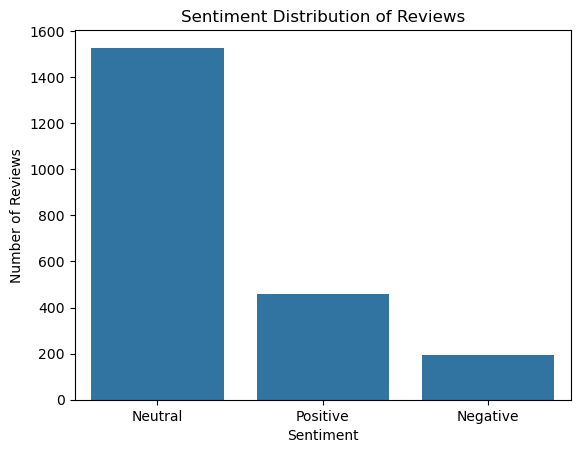

In [78]:
sns.countplot(x='Sentiment', data=product_data)
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

<div style="font-size:18px;">
The majority of customer reviews are neutral, indicating that most customers give moderate feedback. Positive reviews are less frequent, and negative reviews are the fewest.
</div>    

## Rating VS Sentiment 

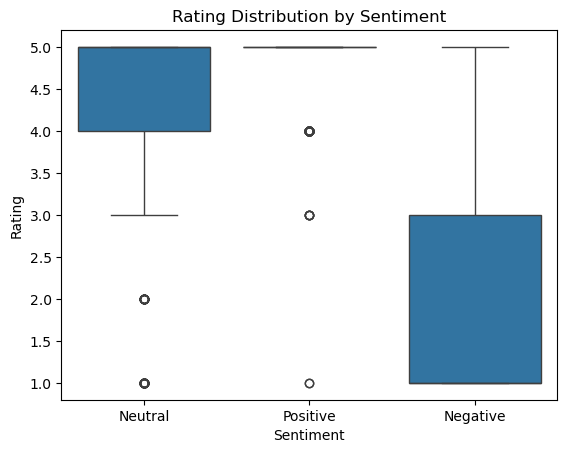

In [79]:
sns.boxplot(x='Sentiment', y='Rating', data=product_data)
plt.title('Rating Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Rating')
plt.show()

<div style="font-size:18px;">
The box plot analysis shows a strong relationship between customer ratings and sentiment.
Positive reviews are mostly associated with high ratings (around 5), while negative reviews correspond to lower ratings (1–3).
Neutral sentiment reviews show a wider spread of ratings, indicating mixed customer opinions.
</div>    

<div style="font-size:18px;">
It proves that sentiment scores align well with customer ratings, validating the effectiveness of VADER sentiment analysis.
</div>    

## Best Performing Product

In [80]:
product_sentiment = product_data.groupby('Product_name')['Sentiment_Score'].mean().sort_values(ascending=False)

In [81]:
top10 = product_sentiment.head(10)

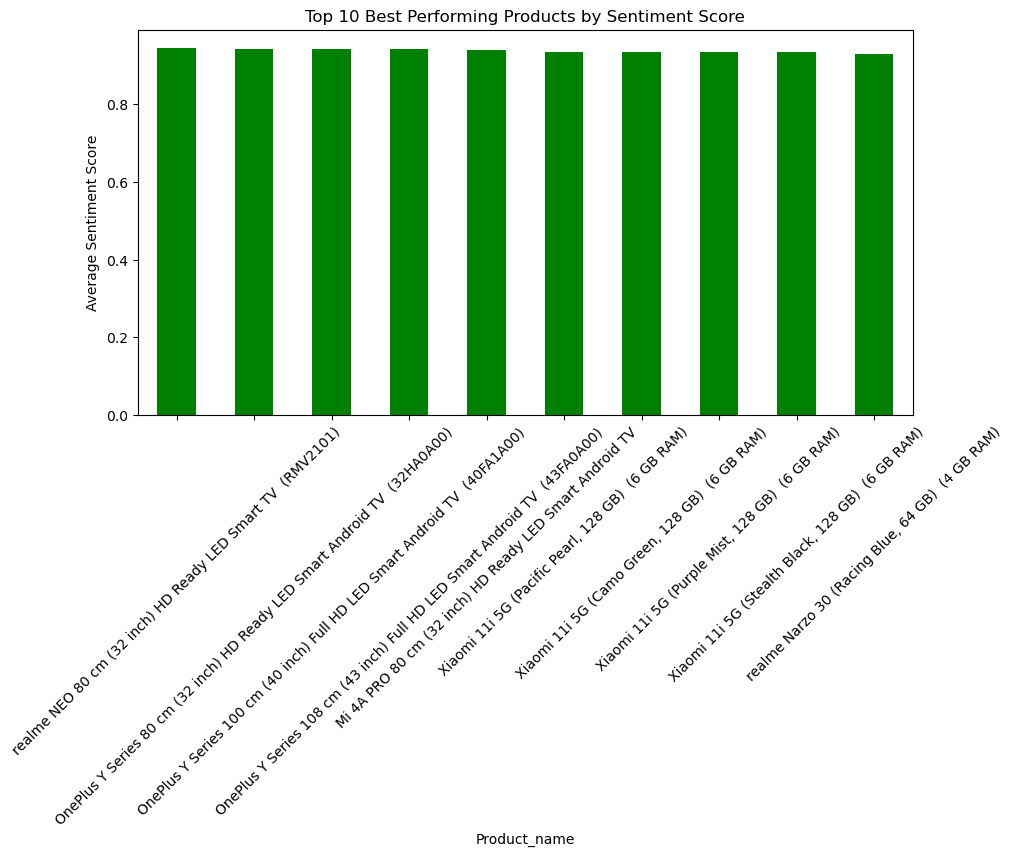

In [82]:
plt.figure(figsize=(10,5))
top10.plot(kind='bar', color='green')
plt.title('Top 10 Best Performing Products by Sentiment Score')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.show()

<div style="font-size:18px;">
The top 10 best performing products have the highest average sentiment scores, indicating strong positive customer feedback.
These plots help identify products that need improvement versus those that are performing well.
</div>    

## Worst Perdorming Product

In [83]:
bottom10 = product_sentiment.tail(10)

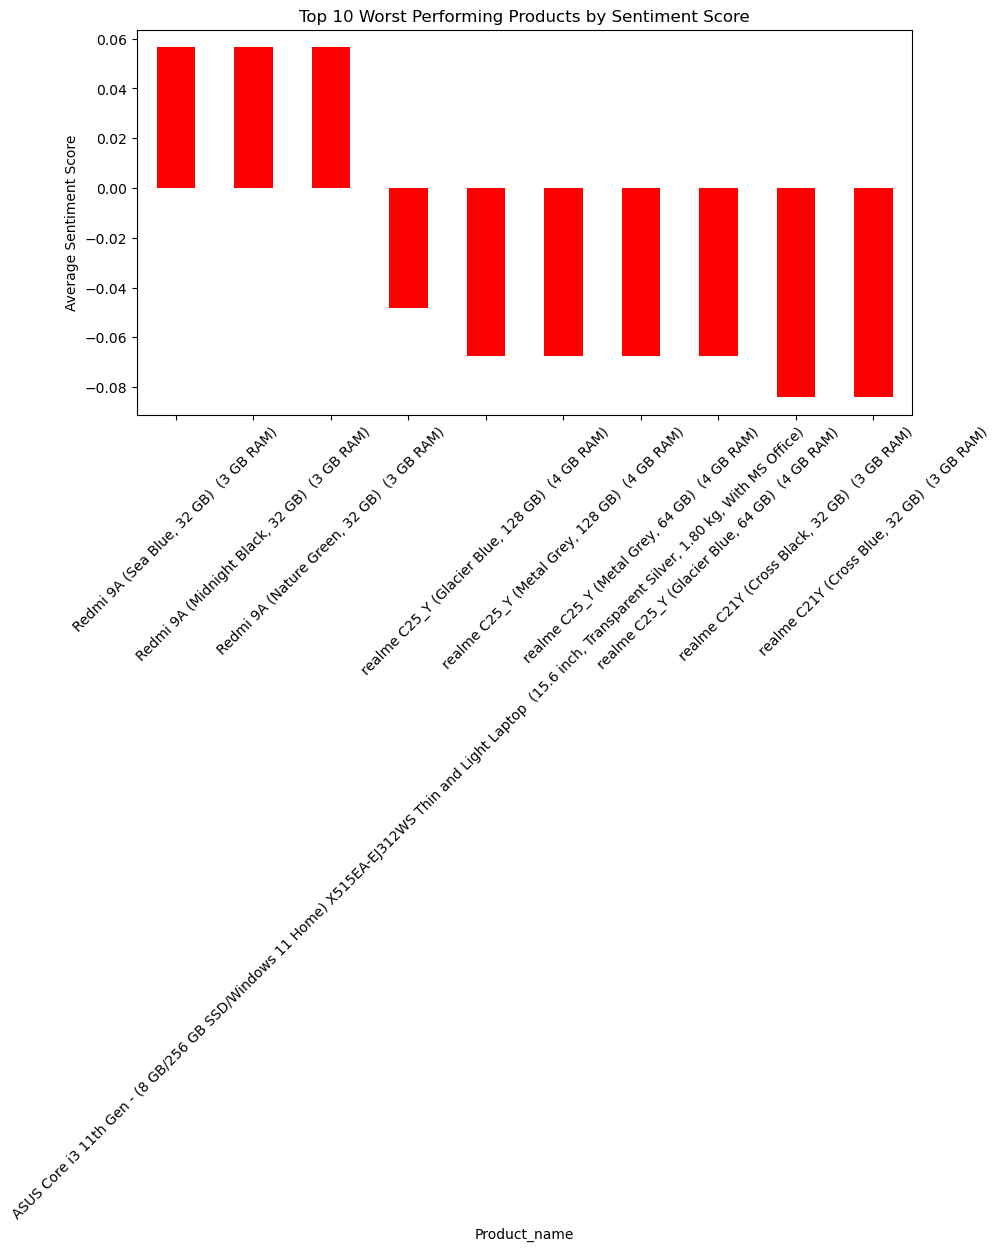

In [84]:
plt.figure(figsize=(10,5))
bottom10.plot(kind='bar', color='red')
plt.title('Top 10 Worst Performing Products by Sentiment Score')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.show()

<div style="font-size:18px;">
The top 10 worst performing products have the lowest average sentiment scores, reflecting mostly negative reviews or complaints.
These plots help identify products that need improvement versus those that are performing well.
</div>    

# Complain Rate by Product

In [85]:
negative_counts = product_data[product_data['Sentiment']=='Negative'].groupby('Product_name').size()

In [86]:
total_counts = product_data.groupby('Product_name').size()

In [87]:
complaint_rate = (negative_counts / total_counts * 100).sort_values(ascending=False).fillna(0)

In [88]:
top_complaints = complaint_rate.head(10)

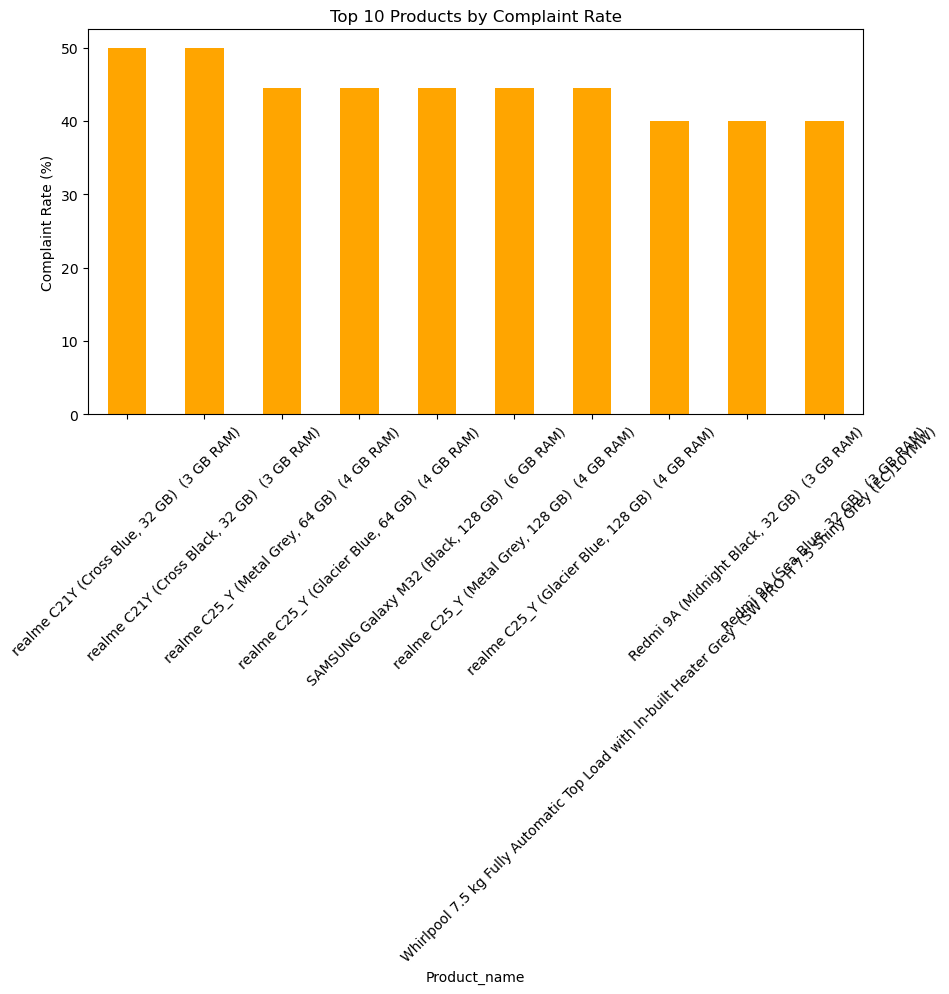

In [89]:
plt.figure(figsize=(10,5))
top_complaints.plot(kind='bar', color='orange')
plt.title('Top 10 Products by Complaint Rate')
plt.ylabel('Complaint Rate (%)')
plt.xticks(rotation=45)
plt.show()

<div style="font-size:18px;">
The top 10 products with the highest complaint rates were identified using the proportion of negative reviews. The tallest yellow bars indicate products with the most negative customer feedback, highlighting areas that may need improvement
</div>    